In [1]:
%pylab inline

from scipy.io import mmread, loadmat
from collections import defaultdict
from humanize import naturalsize
from scipy.sparse import diags
from tabulate import tabulate
from pprint import pprint
from glob import glob

matrices = {mtx[:-4]: mmread(mtx).tocsr() for mtx in glob("*.mtx")}
locals().update(matrices)

Populating the interactive namespace from numpy and matplotlib


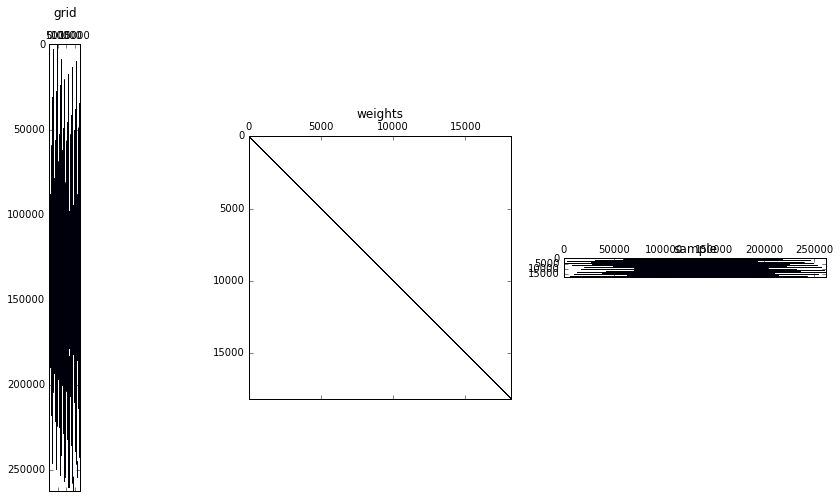

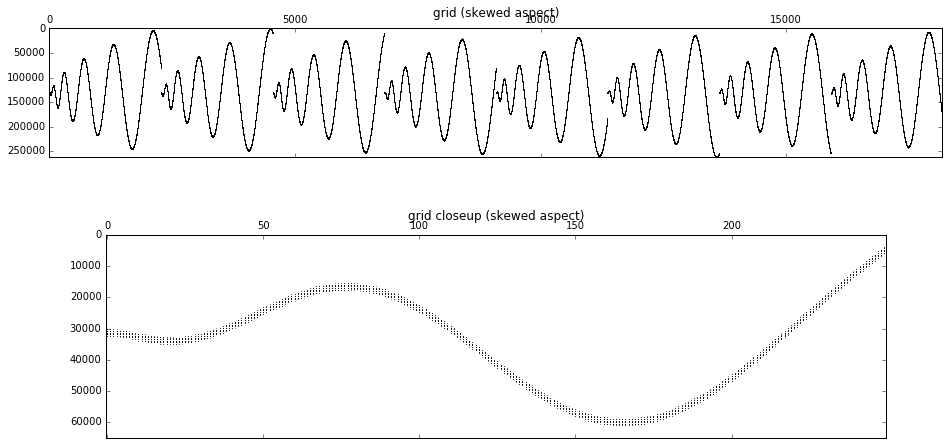

In [2]:
fig = figure(figsize=(16,8))

ax0 = fig.add_subplot(131, title='grid')
ax0.spy(grid, markersize=0.2)

ax1 = fig.add_subplot(132, title='weights')
ax1.spy(weight, markersize=0.2)

ax2 = fig.add_subplot(133, title='sample')
ax2.spy(sample, markersize=0.2)

show()

fig = figure(figsize=(16,8))
ax0 = fig.add_subplot(211, title='grid (skewed aspect)')
ax0.spy(grid, markersize=0.2, aspect=.01)
ax1 = fig.add_subplot(212, title='grid closeup (skewed aspect)')
ax1.spy(grid[1e5:1.65e5,:250], markersize=0.2, aspect=.001)
show()

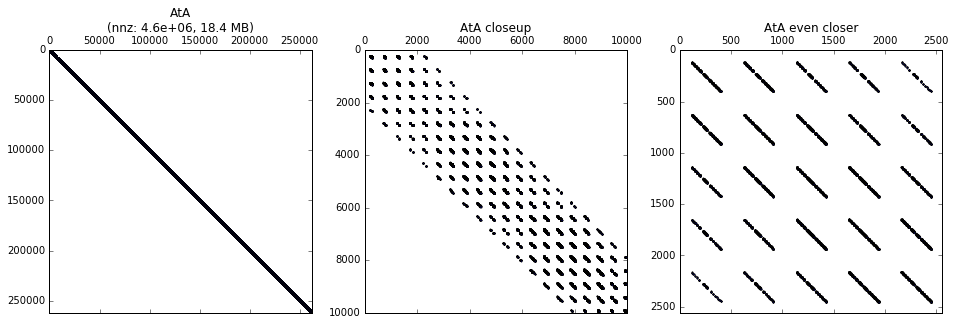

In [3]:
AtA = matrices['AtA'] = grid.dot(weight.dot(sample))

fig = figure(figsize=(16,8))
ax0 = fig.add_subplot(131, title='AtA\n(nnz: %1.1e, %s)' % (AtA.nnz, naturalsize(AtA.nnz * 4)))
ax0.spy(AtA, markersize=0.2)

ax1 = fig.add_subplot(132, title='AtA closeup')
ax1.spy(AtA[:10000,:10000], markersize=1)

start = 256*10 * 8
end   = 256*10 * 9
ax2 = fig.add_subplot(133, title='AtA even closer')
ax2.spy(AtA[start:end,start:end], markersize=1)

show()

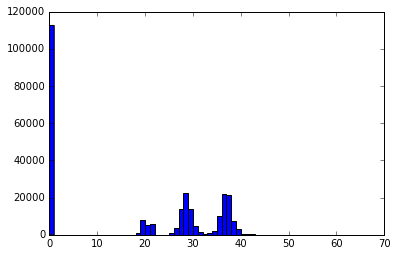

0.42932510376
0.429203673205

0 **************************************************************************************************** 112545
1  
2  
3  
4  
5 ******** 
6 ********************************************** 
7 ** 
8 ************** 
9 ********************************************** 
10 ************************************************ 
11 ****************** 
12 ********** 
13 ************ 
14 ************ 
15 ********************************** 
16 **************************************************************************************************** 102
17 ******************************************************** 
18 **************************************************************************************************** 1040
19 **************************************************************************************************** 7814
20 **************************************************************************************************** 5212
21 *********************************************

In [4]:
# Histogram of row lengths

rowlens =  AtA.indptr[1:] - AtA.indptr[:-1]

hist(rowlens, bins=rowlens.max())
show()

counts = defaultdict(int)
for i in rowlens:
    counts[i] += 1

# Many zeros: spiral only occupies a circle in the square image (.25*pi).
print counts[0] / float(AtA.shape[0])
print (1.0 - pi*.5**2) * 2 # why this factor of two?
print

for k in range(80):
    print k, "*" * min(100, counts[k]), counts[k] if counts[k] > 100 else ""